In [1]:
from brian2 import *
from numpy import sin
%matplotlib inline

# ========= LIF ===========
start_scope()
tau = 20*ms

# Parameters
E_L = -65*mV
R_m = 1*ohm
eqs_LIF = '''
dv/dt = (E_L - v + R_m * I)/tau : volt
I : amp
'''

G_LIF = NeuronGroup(1, eqs_LIF, threshold='v>30*mV', reset='v=E_L', method='euler')
# G_LIF.v = c
statemon_LIF = StateMonitor(G_LIF[:], 'v', record=True)
G_LIF.I = 100*mA

# ========= HH ===========
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV
# The model
eqs_HH = '''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
'''

G_HH = NeuronGroup(1, eqs_HH,
                   threshold='v > 30*mV',
                   refractory='v > 30*mV',
                   method='exponential_euler')

statemon_HH = StateMonitor(G_HH[:], 'v', record=True)
# G_HH.v = X
G_HH.I = 0.1*nA
# run(1000*ms)

# ========= Izhikevich ===========
eqs_Izhikevich = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I)/tau : 1
du/dt = a * (b*v - u)/tau : 1
I : 1
'''

a = 0.01; b = 0.2
c = -65; c_var = 5; d = 8; d_var = 2;

G_izhikevich = NeuronGroup(1, eqs_Izhikevich, threshold='v>30', 
                           reset='''v=c; u=u+d; g=1''', method='euler')
G_izhikevich.v = c
statemon_izhikevich = StateMonitor(G_izhikevich[:], 'v', record=True)
G_izhikevich.I = 60

# t_accumul = 0
run(300*ms)
# for i in range(0, 100):
#     t_accumul += 0.25
#     G_LIF.I = sin(t_accumul) * 10*mA
#     G_HH.I = sin(t_accumul) * 0.1*nA
#     G_izhikevich.I = sin(t_accumul) * 60*mA
#     run(10*ms)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


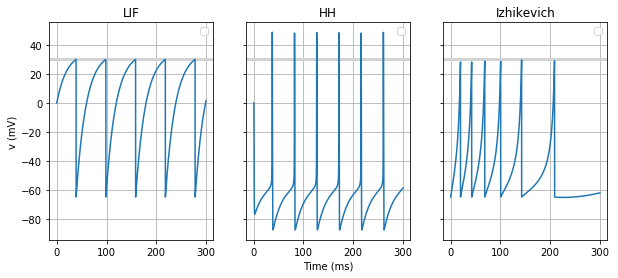

In [2]:
fig3 = figure(figsize=(10, 4))
(ax3, ax4, ax5) = fig3.subplots(1, 3, sharey=True)
ax3.set_ylabel('v (mV)')
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)

# ============= LIF ==============
ax3.axhline(30, ls='-', c='lightgray', lw=3)
ax3.plot(statemon_LIF.t/ms, statemon_LIF.v.T/mV, '-')
ax3.set_title('LIF')
# ax3.set_xlabel('Time (ms)')
ax3.legend();

# ============= HH ===============
ax4.axhline(30, ls='-', c='lightgray', lw=3)
ax4.plot(statemon_HH.t/ms, statemon_HH.v.T/mV, '-')
ax4.set_title('HH')
ax4.set_xlabel('Time (ms)')
ax4.legend();

# ========= Izhikevich ===========
ax5.axhline(30, ls='-', c='lightgray', lw=3)
ax5.plot(statemon_izhikevich.t/ms, statemon_izhikevich.v.T, '-')
ax5.set_title('Izhikevich')
# ax5.set_xlabel('Time (ms)')
ax5.legend();

fig3.savefig('./neurons.eps', format='eps', dpi=1200)